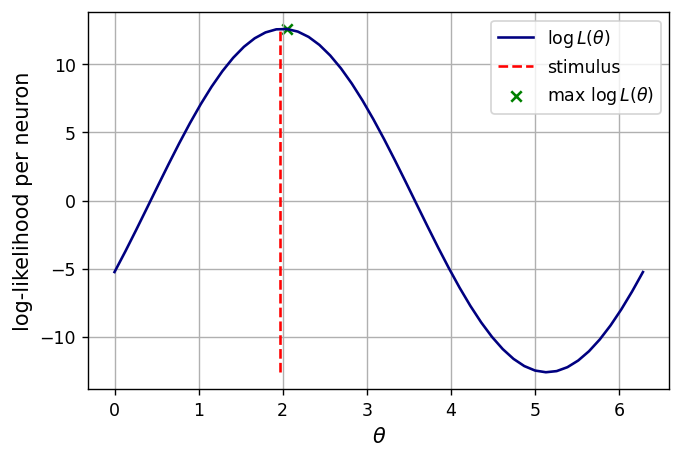

In [40]:
import numpy as np 
import matplotlib.pyplot as plt 

N=720

def log_f(theta, theta_tune, kappa=3):
    return kappa*np.cos(theta-theta_tune)

def simulated_response(log_f, N):
    return np.random.poisson(lam=np.exp(log_f), size=N)

theta_tune = np.random.uniform(low=0, high=2*np.pi, size=N)


random_theta = np.random.rand()*2*np.pi
response = simulated_response(log_f(random_theta, theta_tune), N)
theta_range = np.linspace(0, 2*np.pi, 50)

def log_likelihood(response, theta, theta_tune):
    return np.dot(response, log_f(theta, theta_tune))

full_log_likelihood=[]
for theta in theta_range:
    full_log_likelihood.append(log_likelihood(response, theta, theta_tune))

full_log_likelihood=np.array(full_log_likelihood)

plt.figure(dpi=125)
plt.plot(theta_range, full_log_likelihood/N, label="$\log L(\\theta)$", c="navy")
plt.vlines(x=random_theta, ymin=np.min(full_log_likelihood/N), 
                ymax=np.max(full_log_likelihood/N), color="red", 
                linestyles='dashed', label="stimulus")
plt.scatter(theta_range[np.argmax(full_log_likelihood)], 
                np.max(full_log_likelihood)/N, c="g", marker="x",
                label="max $\log L(\\theta)$")
plt.xlabel("$\\theta$", fontsize=12)
plt.ylabel("log-likelihood per neuron", fontsize=12)
plt.legend()
plt.grid()